# 2.40 Python Matplotlib Графическое проектирование
Создатель Matplotlib Джон Д. Хантер - нейробиолог. 

Он искал способ дать Python возможности построения графиков MATLAB. 

Доктор Хантер входил в состав Numfocus 

(курирует крупные проекты Python, включая Matplotlib, NumPy, Pandas и Jupyter)

---

Этапы графического проектирования:
- подключение пакетов и загрузка данных
- отбор значений из данных
- определение вида графика и его параметров
- уточнение деталей и соединение с другими видами информации
- презентация на вебстранице, в ноутбуке и т.п.

In [1]:
# подключение пакетов
import numpy as np, pandas as pd, pylab as pl
# для онлайн ноутбуков 
# pylab - интерактивное сочетание matplotlib и numpy 
# для файлов py ===> import matplotlib.pyplot as plt

## Обзор параметров линий на плоскости

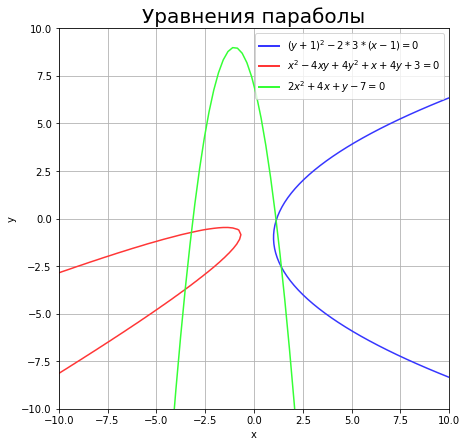

In [2]:
from matplotlib.lines import Line2D
# массив значений аргумента
X = np.linspace(start=-12,stop=12,num=100)
# создание координатной сетки, т.е. пар аргументов (х,у)
X, Y = np.meshgrid(X, X)
# формула параболы в разных видах 
def parabole1(x0,y0,p,x,y): 
    return (y-y0)**2-2*p*(x-x0)
def parabole2(a,b,c,d,e,f,x,y): 
    return a*x**2+b*x*y+c*y**2+d*x+e*y+f
def parabole3(a,d,e,f,x,y): 
    return a*x**2+d*x+e*y+f
# список функций с заданными коэффициентами
f3 = [parabole1(1, -1, 3, X, Y),
      parabole2(1, -4, 4, 1, 4, 3, X, Y),
      parabole3(2, 4, 1, -7, X, Y)]
# фигура (графическое пространство) 
# с установленной шириной и высотой
fig = pl.figure(figsize=(7,7))
# ax - единственный график
ax = fig.add_subplot(111)
# координатная сетка
pl.grid()
# выбор цвета линий
colors=['#3636ff','#ff3636','#36ff36']
# lines - фейковые линии для размещения формул функций
lines=[Line2D([0],[0], color=c, linewidth=2,
       linestyle='-') for c in colors]
# latex для математического отображения формул
labels=['$(y+1)^2-2*3*(x-1)=0$',
        '$x^2-4xy+4y^2+x+4y+3=0$',
        '$2x^2+4x+y-7=0$']
# три контурных графика
for i in range(3):
    ax.contour(X, Y, f3[i], [0], colors=[colors[i]])
# границы координатной сетки
ax.set_xlim(-10, 10); ax.set_ylim(-10, 10)
# обозначения осей
ax.set_xlabel('x'); ax.set_ylabel('y')
# формулы функций в верхнем правом углу
ax.legend(lines, labels, loc=1)
# заголовок с размером шрифта = 20
pl.title('Уравнения параболы', fontsize=20);

## Задание
- Преобразовать численные параметры парабол в переменные 
- Добавить в формулы функций и в строки LaTex.

Необходимо изменить фрагменты кода:
```
f3 = [parabole1(1, -1, 3, X, Y),
      parabole2(1, -4, 4, 1, 4, 3, X, Y),
      parabole3(2, 4, 1, -7, X, Y)]

labels=['$(y+1)^2-2*3*(x-1)=0$',
        '$x^2-4xy+4y^2+x+4y+3=0$',
        '$2x^2+4x+y-7=0$']
```

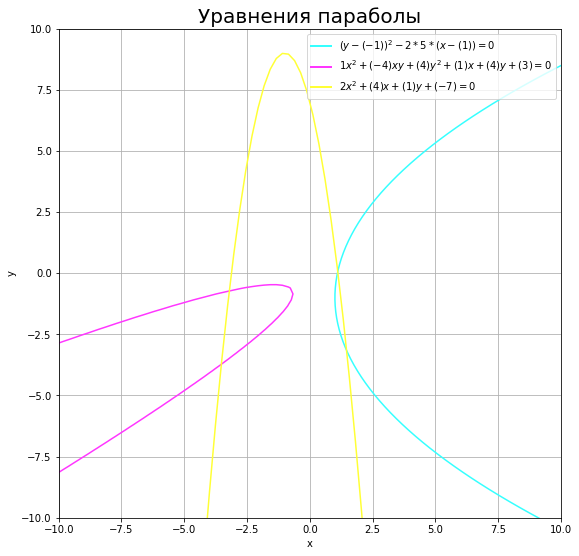

In [3]:
# коэффициенты парабол в качестве переменных
k1 = [1,-1, 5]
k2 = [1, -4, 4, 1, 4, 3]
k3 = [2, 4, 1, -7]
# список функций с заданными значениями переменных
f3 = [parabole1(k1[0], k1[1], k1[2], X, Y),
      parabole2(k2[0], k2[1], k2[2],
                k2[3], k2[4], k2[5], X, Y),
      parabole3(k3[0], k3[1], k3[2], k3[3], X, Y)]
# latex для математического отображения формул      
labels = [f'$(y-({k1[1]}))^2-2*{k1[2]}*(x-({k1[0]}))=0$',
          f'${k2[0]}x^2+({k2[1]})xy+({k2[2]})y^2+'+\
          f'({k2[3]})x+({k2[4]})y+({k2[5]})=0$',
          f'${k3[0]}x^2+({k3[1]})x+({k3[2]})y+({k3[3]})=0$']
# фигура (графическое пространство) 
# с установленной шириной и высотой
fig = pl.figure(figsize=(9,9))
# ax - единственный график
ax = fig.add_subplot(111)
# координатная сетка
pl.grid()
# выбор цвета линий
colors=['#36ffff','#ff36ff','#ffff36']
# lines - фейковые линии для размещения формул функций
lines=[Line2D([0],[0], color=c, linewidth=2,
       linestyle='-') for c in colors]
# три контурных графика
for i in range(3):
    ax.contour(X, Y, f3[i], [0], colors=[colors[i]])
# границы координатной сетки
ax.set_xlim(-10, 10); ax.set_ylim(-10, 10)
# обозначения осей
ax.set_xlabel('x'); ax.set_ylabel('y')
# формулы функций в верхнем правом углу
ax.legend(lines, labels, loc=1)
# заголовок с размером шрифта = 20
pl.title('Уравнения параболы', fontsize=20);

## Интерактивность Jupyter 

In [4]:
# список из 3 вещественных чисел => цвет RGB 
import ipywidgets as iw
# изменение параметров интерактивного представления
iw1 = iw.interact_manual.options(manual_name="обновить")
# определение границ интерактивных полей
@iw1(freq=(0., 2.), lw=(1., 7.), 
     red=(0., 1.), green=(0., 1.), blue=(0., 1.))
def plot(freq=1., lw=4, grid=True,
         red=.9, green=.1, blue=.3):
    # три параметра перехоят в оттенок цвета
    color=[red, green, blue]
    # множество значений аргумента
    t = np.linspace(-1., +1., 1000)
    # определение графического пространства
    fig, ax = pl.subplots(1, 1, figsize=(8, 4))
    # график тригонометрической функции
    ax.plot(t, np.sin(2 * np.pi * freq * t), lw=lw, color=color)
    # координатная сетка и заголовок
    ax.grid(grid); pl.title('color: '+str(color))
    # внутри функции необходима дополнительная команда
    pl.show();

interactive(children=(FloatSlider(value=1.0, description='freq', max=2.0), FloatSlider(value=4.0, description=…

## Задание
Изменить текст кнопки

In [5]:
import datetime as dt, ipywidgets as iw
now = lambda: print(dt.datetime.now())
iw.interactive(
    now, {'manual': True, 'manual_name': 'Обновить'})

interactive(children=(Button(description='Обновить', style=ButtonStyle()), Output()), _dom_classes=('widget-in…

## 3D изображения

a=12; b=1.5; c=4


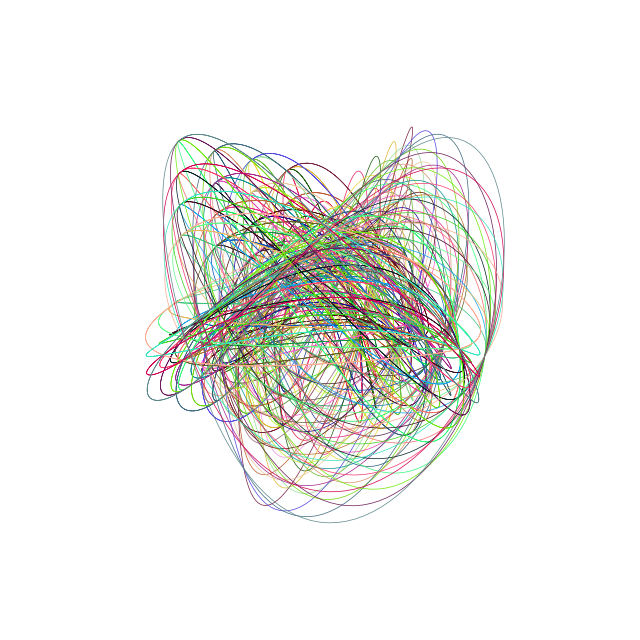

In [6]:
# подключение пакетов
import random
from mpl_toolkits.mplot3d import Axes3D
# генерация случаных коэффициентов
a,b,c=random.randint(2,12),1.5,random.randint(1,7) 
print('a=%d; b=%.1f; c=%d'%(a,b,c))
# создание массива значений аргумента
r=np.arange(1,c+1); th=.1+random.random()
t=np.arange(-2*b*np.pi,2*b*np.pi,5/10**random.randint(1,3)) 
# подсчет значений функций
fx=(a+np.cos(b*t))*np.cos(t)
fy=(a+np.cos(b*t))*np.sin(t)
fz=np.sin(b*t)
# определение размеров графического пространства и 3-хмерной проекции
fig, ax = pl.subplots(subplot_kw={"projection": "3d"},figsize=(9,9))
for i in r:
    for j in r:
        for k in r:
# установка цвета линии и ее отображение
            col=[random.random() for l in range(3)]
            ax.plot(i*fx,j*fy,k*fz,c=col,linewidth=th)
# подавление неиспользуемых полей графика и изображения осей
pl.tight_layout(); pl.axis('off'); 

## Применение пакетов Pandas & Matplotlib 
### № 1 Графическое отображение данных с веб-страниц

In [7]:
# ссылка на сайт с курсами валют
url='https://www.ecb.europa.eu/stats/policy_and_exchange_rates/'+\
    'euro_reference_exchange_rates/html/index.en.html'
# сведения о курсах валют со страницы сайта
exchange_rates=pd.read_html(url)[0].drop('Chart',axis=1)
# сохранение в файл
exchange_rates.to_hdf('exchange_rates.h5',key='spot',mode='w')
# проверка содержания файла
pd.read_hdf('exchange_rates.h5','spot').head(7).T

0             1              2             3  \
Currency          USD           JPY            BGN           CZK   
Currency.1  US dollar  Japanese yen  Bulgarian lev  Czech koruna   
Spot           1.0554        143.88         1.9558        23.619   

                       4               5                 6  
Currency             DKK             GBP               HUF  
Currency.1  Danish krone  Pound sterling  Hungarian forint  
Spot              7.4426         0.88073            379.93

Источник информации: [ecb.europa.eu](https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/index.en.html)

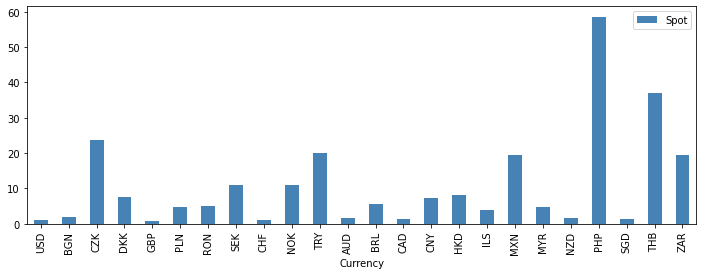

In [8]:
# применение matplotlib к рамке данных pandas
exchange_rates[exchange_rates['Spot']<80]\
.set_index('Currency').plot.bar(
    figsize=(12,4), color='steelblue');

### № 2 Совмещение графических и табличных представлений

In [9]:
# ссылка на расположение файла
user='https://raw.githubusercontent.com/OlgaBelitskaya/'
path='machine_learning_engineer_nd009/'+\
     'master/Machine_Learning_Engineer_ND_P3/'
# загрузка файла в рамку данных
customers=pd.read_csv(user+path+'customers.csv')

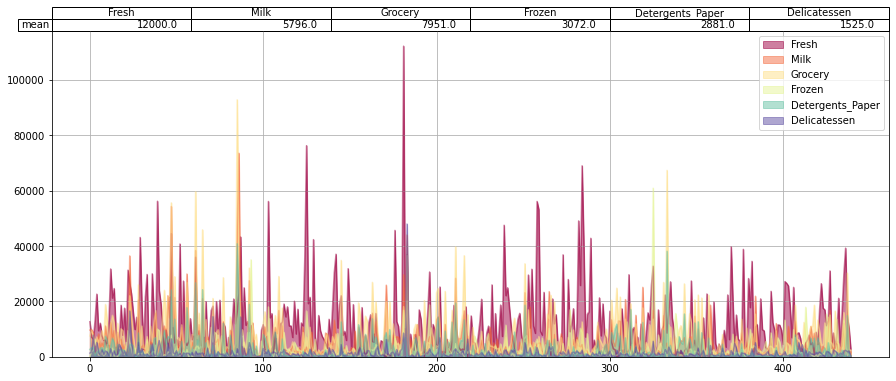

In [10]:
# определение размеров графического пространства
fig=pl.figure(figsize=(15,6))
ax=fig.add_subplot(111)
# заливка - от каждой линии до оси х
customers.iloc[:,2:].plot.area(
    stacked=False,ax=ax,cmap='Spectral')
# подсчет и округление средних значений по столбцам
customers_mean=pd.DataFrame(
    customers.iloc[:,2:].mean().round()).T
# установка индекса для показателя
customers_mean.index=['mean']
# добавление табличной строки в график
pd.plotting.table(ax,customers_mean,loc='top')
# координатная сетка
pl.grid();

In [11]:
# столбец средних значений
customers_mean=pd.DataFrame(
    customers.iloc[:,2:].mean().round())
customers_mean

0
Fresh             12000.0
Milk               5796.0
Grocery            7951.0
Frozen             3072.0
Detergents_Paper   2881.0
Delicatessen       1525.0

### № 3 Группировка данных

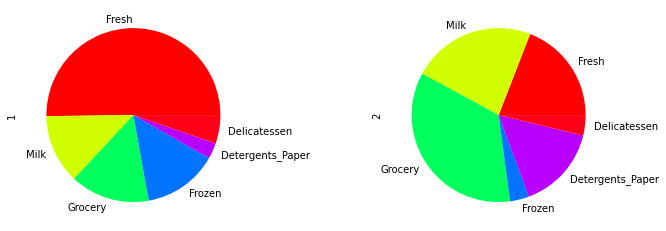

In [12]:
# удаляем столбец "Регионы", не участвующий в подсчете
customersR = customers.drop('Region', axis=1)
# разбиваем на 2 группы по каналам поставок
customersR = customersR.groupby('Channel').sum().T
# отображаем на графике типа "Пирог" категории товаров 
customersR.plot.pie(subplots=True, figsize=(12, 4),
                    legend=False, cmap='hsv');

### №4 Использование географических сведений

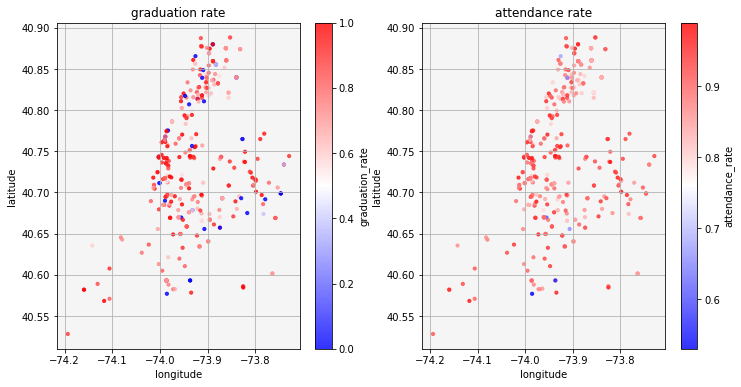

In [13]:
# загрузка файла
fp='https://raw.githubusercontent.com/'+\
   'OlgaBelitskaya/data/main/external_json/'
se=pd.read_json(fp+'h7rb-945c.json')
# определение полей данных
fl=['dbn','ell_programs','language_classes','finalgrades','total_students',
    'graduation_rate','attendance_rate','college_career_rate','pct_stu_safe',
    'pct_stu_enough_variety','latitude','longitude','council_district','city']
# удаление ненужных столбцов и строк с отсутствующими значениями
se=se[fl].dropna()
# определение графического пространства
f,ax=pl.subplots(ncols=2,figsize=(12,6))
for i in range(2):
    # замена неподходящих значений нулями
    se[fl[i+5]]=se[fl[i+5]].astype('str')\
    .str.replace('N/A','0').astype('float')
    # нанесение точек в соответствии с координатами
    se.plot(kind='scatter',
            x='longitude',y='latitude',
            s=10,c=fl[i+5],
            cmap=pl.cm.bwr, # цвет установлен в соответствии с показателями
            title=fl[i+5].replace('_',' '),
            ax=ax[i],alpha=.8,grid=True)
    # цвет фона
    ax[i].set_facecolor('whitesmoke');

## Расширенные возможности

### Применение пакетов Pandas & Plotly 

In [14]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
cf.go_offline()
init_notebook_mode(connected=False)

In [15]:
def plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
<script src="/static/components/requirejs/require.js"></script>
<script>
    requirejs.config({
        paths: {base: '/static/base',
                plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',},
        });
</script>'''))

In [16]:
df = pd.DataFrame({
    'month': ['January', 'February', 'March', 'April', 
              'May', 'June', 'July', 'August', 'September', 
              'October', 'November', 'December'],
    '2018': [3.26, 6.11, 4.86, 6.53, 4.45, 3.86, 8.04, 
             7.59, 1.48, 4.75, 7.27, 11.83],
    '1996': [8.26, 3.82, 6.42, 2.91, 2.12, 1.70, 2.14, 
             4.66, 4.32, 0.89, 3.22, 4.14]
})
plotly_browser_state()
df.iplot(kind='line',x='month',y=['2018','1996'], 
         color=['whitesmoke', 'gold'],theme='solar',
         mode='markers+lines',title='Annual Rainfall');

### `geopandas` Создание собственных картографических изображений

In [17]:
!pip install --upgrade geopandas OSMPythonTools -q
#gdal.SetConfigOption("OGR_GEOMETRY_ACCEPT_UNCLOSED_RING","NO")
#fiona._env?

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [18]:
from OSMPythonTools.nominatim import Nominatim
nominatim = Nominatim()
from OSMPythonTools.overpass import overpassQueryBuilder,Overpass
overpass = Overpass()
import geopandas, logging, warnings
warnings.filterwarnings('ignore')
logging.getLogger('OSMPythonTools').setLevel(logging.ERROR)

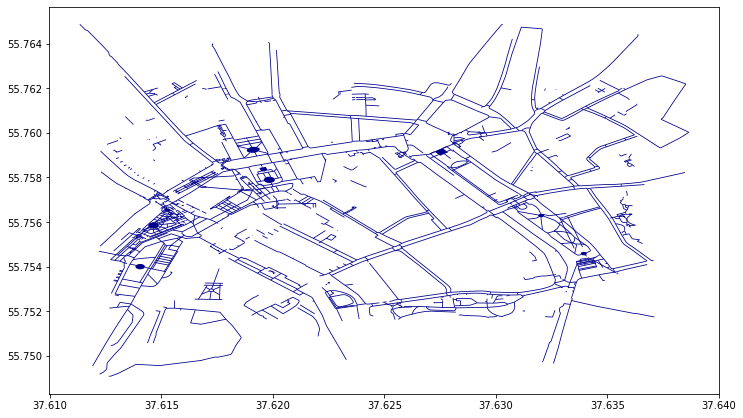

In [19]:
# Moscow_areaId = nominatim.query('Moscow, Russia').areaId()
def df_obj(obj):
    hw_geo = overpassQueryBuilder(
        elementType='way',bbox=[55.752,37.613,55.762,37.636],
        selector=f'{obj}', includeGeometry=True)
    hw_data = overpass.query(hw_geo, timeout=60)
    hw_locs = [(w.id(), w.geometry(),w.tag(obj)) for w in hw_data.ways()]
    return geopandas.GeoDataFrame(hw_locs,columns=['id','geometry','tag'])
hw = df_obj('highway')
hw[hw['tag']=='footway'].plot(figsize=(12,10),linewidth=.8,color='darkblue');
